In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import math
import statsmodels.formula.api as smf

In [2]:
df=pd.read_excel('wenke1ben.xls')

# 变量分布图

C:\Users\dyw2000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


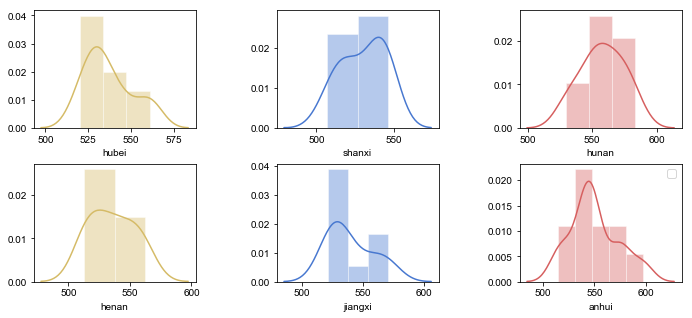

In [3]:
fig, axes = plt.subplots(2,3,figsize=(10, 5))
plt.subplots_adjust(wspace = 0.5,left=0.05,right=0.95, hspace=0.3)
sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(df['hubei'], ax = axes[0,0], color="y")
sns.distplot(df['henan'], ax = axes[1,0], color="y")
sns.distplot(df['shanxi'], ax = axes[0,1], color="b")
sns.distplot(df['jiangxi'], ax = axes[1,1], color="b")
sns.distplot(df['hunan'], ax = axes[0,2], color="r")
sns.distplot(df['anhui'], ax = axes[1,2], color="r")

plt.legend(loc = 'best')
plt.show()

In [4]:
df['hubei'] = [math.log(item) for item in df['hubei']]
df['henan'] = [math.log(item) for item in df['henan']]
df['jiangxi'] = [math.log(item) for item in df['jiangxi']]
df['anhui'] = [math.log(item) for item in df['anhui']]

No handles with labels found to put in legend.


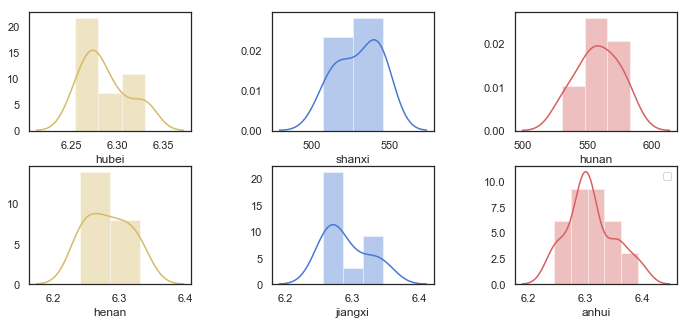

In [5]:
# 绘制变量分布图
fig, axes = plt.subplots(2,3,figsize=(10, 5))
plt.subplots_adjust(wspace = 0.5,left=0.05,right=0.95, hspace=0.3)
sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(df['hubei'], ax = axes[0,0], color="y")
sns.distplot(df['henan'], ax = axes[1,0], color="y")
sns.distplot(df['shanxi'], ax = axes[0,1], color="b")
sns.distplot(df['jiangxi'], ax = axes[1,1], color="b")
sns.distplot(df['hunan'], ax = axes[0,2], color="r")
sns.distplot(df['anhui'], ax = axes[1,2], color="r")

plt.legend(loc = 'best')
plt.show()

In [6]:
df010 = df.drop(index = 0)
df011 = df[0:1]

In [7]:
y01=df010.hubei

In [8]:
X01=df010[['year','henan','shanxi','jiangxi','hunan','anhui']]                         
X01=sm.add_constant(X01)

In [9]:
est=sm.OLS(y01,X01).fit()

In [10]:
est.summary()

C:\Users\dyw2000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hubei   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     45.18
Date:                Fri, 11 Dec 2020   Prob (F-statistic):            0.00494
Time:                        16:00:50   Log-Likelihood:                 44.858
No. Observations:                  10   AIC:                            -75.72
Df Residuals:                       3   BIC:                            -73.60
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5684      3.671     -0.972      0.403     -15.252       8.115
year           0.0019      0.002      1.233      0.305      -0.003       0.007
henan          0.5155      0.172      2.991      0.058      -0.033       1.064
shanxi        -0.0006      0.000     -1.706      0.187      -0.002       0.001
jiangxi        0.4216      0.096      4.397      0.022       0.116       0.727
hunan          0.0006      0.000      2.466      0.090      -0.000       0.001
anhui          0.0067      0.051      0.130      0.905      -0.157       0.170
==============================================================================
Omnibus:                        0.063   Durbin-Watson:                   2.808
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.109
Skew:                          -0.021   Prob(JB):                        0.947
Kurtosis:                       2.489   Cond. No.                     5.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

      hubei    resids  std_resids    fitted
1  6.295266 -0.005024   -1.009348  6.300290
2  6.329721  0.004976    0.999723  6.324745
3  6.269096 -0.001195   -0.240009  6.270291
4  6.253829  0.002563    0.514815  6.251266
5  6.255750 -0.000288   -0.057875  6.256038


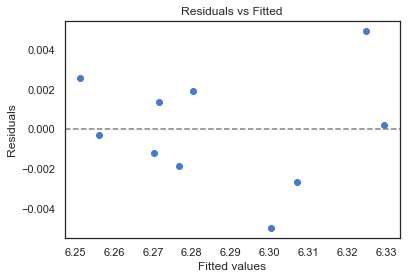

In [11]:
lm = smf.ols(formula = 'y01 ~ X01', data = df010).fit()
results = pd.DataFrame({'hubei': y01, # y实际值
                        'resids': lm.resid, # 残差
                        'std_resids': lm.resid_pearson, # 方差标准化的残差
                        'fitted': lm.predict() # y预测值
                       })
print(results.head())

# 残差拟合图：横坐标是拟合值，纵坐标是残差。
residsvfitted = plt.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed') # 绘制y=0水平线
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show(residsvfitted)
